<a href="https://colab.research.google.com/github/michikotanaka/dso559/blob/main/Songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# name etc.

In [63]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# needed to evaluate the model
from sklearn.metrics import mean_squared_error # MSE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# write to excel
from google.colab import files 

# Data Understanding

## Data overview

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/michikotanaka/dso559/main/Songs-utf8.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88386 entries, 0 to 88385
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                88386 non-null  int64  
 1   genre             88386 non-null  object 
 2   artist_name       88386 non-null  object 
 3   track_name        88386 non-null  object 
 4   track_id          88386 non-null  object 
 5   popularity        61869 non-null  float64
 6   acousticness      88386 non-null  float64
 7   danceability      88386 non-null  float64
 8   duration_ms       88386 non-null  int64  
 9   energy            88386 non-null  float64
 10  instrumentalness  88386 non-null  float64
 11  key               88386 non-null  object 
 12  liveness          88386 non-null  float64
 13  loudness          88386 non-null  float64
 14  mode              88386 non-null  object 
 15  speechiness       88386 non-null  float64
 16  tempo             88386 non-null  float6

In [ ]:
df.head()

,No,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,streams
0,1,Children's Music,The Hit Crew Kids,All I Want for Christmas is You,4qay5fwn7RjLWUjfipa3fY,0.0,0.116000,0.484,233947,0.7200,0.000000,G,0.144,-8.381,Major,0.0328,150.061,0.398,37518.0
1,2,Classical,John Philip Sousa,"March of the Pan Americans: No. 17, Paraguay",4yiaXHY8qYxpEVfeJOlFDz,0.0,0.978000,0.363,171213,0.0847,0.828000,G#,0.205,-20.635,Major,0.0377,110.662,0.484,3963.0
2,3,Country,Dierks Bentley,My Last Name,5Sgozi87WjzpSxQnzKO8J7,0.0,0.568000,0.583,210240,0.3670,0.000000,D,0.144,-10.576,Major,0.0311,72.059,0.197,5398631.0
3,4,Folk,Against Me!,"Sink, Florida, Sink",3JYWwjsqtBPQ7xQyIg6x0c,0.0,0.660000,0.592,160667,0.3400,0.000052,C,0.233,-9.796,Major,0.0384,123.598,0.155,1152546.0
4,5,Ska,Teenage Bottlerocket,I Found The One,1lXgfyQsOfwtGE26Hh9jXb,0.0,0.000342,0.459,137080,0.9130,0.001130,G,0.124,-3.903,Major,0.0480,177.984,0.806,294935.0


In [ ]:
df.tail()

,No,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,streams
88381,88382,Rap,Mac Dre,Fellin' Myself,4sqGlfDc7QCPvAvUBk4OKn,NaN,0.0502,0.836,224813,0.575,0.000055,C,0.231,-6.483,Minor,0.0585,99.985,0.656,NaN
88382,88383,Dance,R3HAB,Good Intentions (feat. Lourdiz),0NRtHFRrv7ELyvoAjc0nLF,NaN,0.3180,0.463,144687,0.652,0.000000,A,0.079,-6.401,Minor,0.0523,96.219,0.195,NaN
88383,88384,Hip-Hop,Injury Reserve,What's Goodie (feat. Cakes da Killa),3BhSiKrzvrROupHmoxq12R,NaN,0.1010,0.584,174314,0.702,0.000000,F#,0.118,-5.585,Minor,0.3380,127.051,0.795,NaN
88384,88385,Hip-Hop,2 Chainz,Forgiven (feat. Marsha Ambrosius),6f6xUMBUrXYK3JrlXXCm3R,NaN,0.1550,0.491,323307,0.523,0.000000,G,0.405,-9.417,Major,0.5920,73.790,0.243,NaN
88385,88386,Dance,Yelle,Je veux te voir,4H9637mkUDyk9Rq0WgDEwc,NaN,0.0203,0.924,261920,0.651,0.006900,G,0.059,-3.894,Major,0.1240,126.947,0.898,NaN


## Remove Null data for creating model


In [3]:
# Drop rows having NaN
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61869 entries, 0 to 61868
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                61869 non-null  int64  
 1   genre             61869 non-null  object 
 2   artist_name       61869 non-null  object 
 3   track_name        61869 non-null  object 
 4   track_id          61869 non-null  object 
 5   popularity        61869 non-null  float64
 6   acousticness      61869 non-null  float64
 7   danceability      61869 non-null  float64
 8   duration_ms       61869 non-null  int64  
 9   energy            61869 non-null  float64
 10  instrumentalness  61869 non-null  float64
 11  key               61869 non-null  object 
 12  liveness          61869 non-null  float64
 13  loudness          61869 non-null  float64
 14  mode              61869 non-null  object 
 15  speechiness       61869 non-null  float64
 16  tempo             61869 non-null  float6

In [ ]:
df.describe()

,No,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,streams
count,61869.000000,61869.000000,61869.000000,61869.000000,6.186900e+04,61869.000000,61869.000000,61869.000000,61869.000000,61869.000000,61869.000000,61869.000000,6.186900e+04
mean,30935.000000,0.291842,0.404532,0.541874,2.358241e+05,0.557037,0.170840,0.225572,-10.143236,0.128709,116.991306,0.452148,1.321077e+07
std,17860.186239,0.454614,0.365306,0.190122,1.324530e+05,0.275314,0.321730,0.212372,6.398068,0.206107,31.336294,0.267600,5.251587e+07
min,1.000000,0.000000,0.000000,0.057300,1.664000e+04,0.000098,0.000000,0.010200,-47.499000,0.022500,31.689000,0.000000,3.830000e+02
25%,15468.000000,0.000000,0.045800,0.417000,1.779070e+05,0.344000,0.000000,0.097700,-12.844000,0.036900,91.976000,0.222000,4.296930e+05
50%,30935.000000,0.000000,0.291000,0.559000,2.192130e+05,0.592000,0.000069,0.130000,-8.197000,0.049500,114.848000,0.441000,1.994378e+06
75%,46402.000000,1.000000,0.789000,0.684000,2.684400e+05,0.789000,0.087800,0.278000,-5.633000,0.103000,138.162000,0.667000,8.249651e+06
max,61869.000000,1.000000,0.996000,0.989000,5.552917e+06,0.999000,0.997000,1.000000,3.744000,0.967000,242.903000,0.996000,3.041412e+09


## Check data: popularity vs numerical columns

In [ ]:
# Check paired value relation
# --> takes too long, give up
#sns.pairplot(df.sample(frac=0.01))

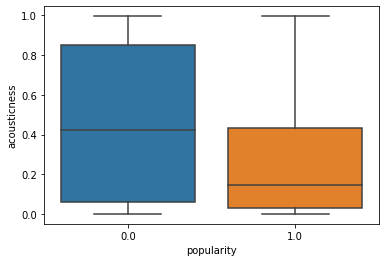

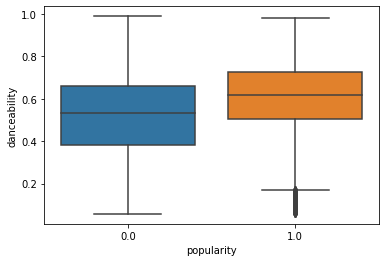

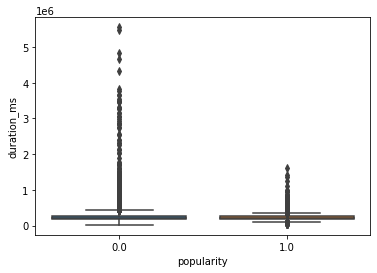

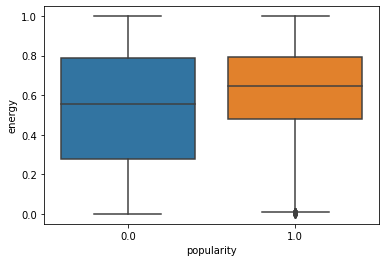

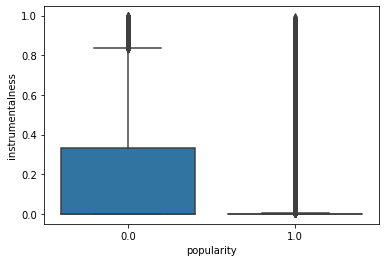

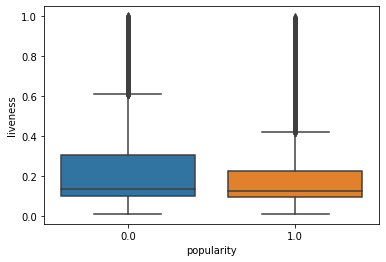

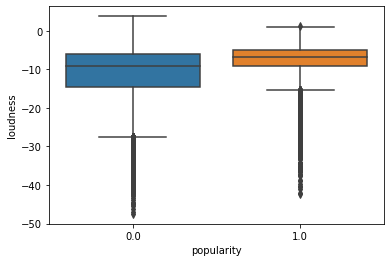

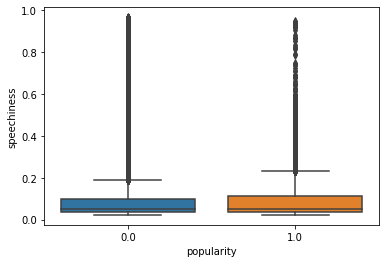

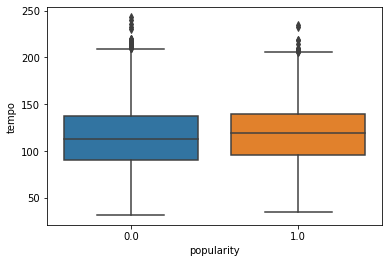

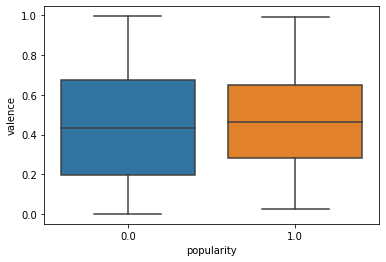

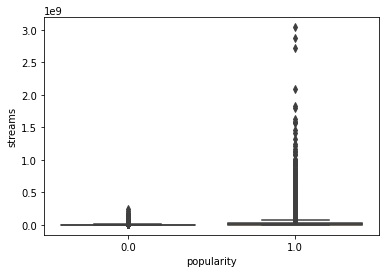

In [ ]:
# Plot popularity vs numerical columns
for c in np.array(df.columns)[[6,7,8,9,10,12,13,15,16,17,18]]:
  plt.figure()
  sns.boxplot(data=df, x='popularity',y=c)

Tempo, duration seems not necessary for prediction


## Check data: popularity vs string columns


### key

In [ ]:
df['key'].value_counts()

C     7316
G     7179
D     6457
A     6107
C#    6046
F     5496
E     4678
B     4504
A#    4076
F#    4063
G#    3923
D#    2024
Name: key, dtype: int64

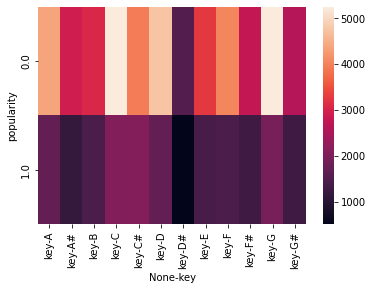

In [ ]:
sns.heatmap(df.groupby(['popularity','key']).agg({'key':'count'}).unstack())

### mode

In [ ]:
df['mode'].value_counts()

Major    40903
Minor    20966
Name: mode, dtype: int64

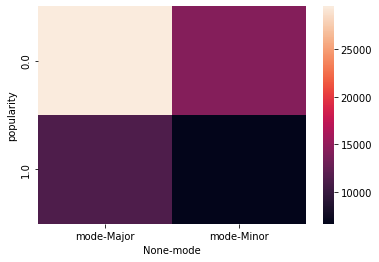

In [ ]:
sns.heatmap(df.groupby(['popularity','mode']).agg({'mode':'count'}).unstack())

### genre

In [ ]:
df['genre'].value_counts()

Comedy              3453
Electronic          3179
Alternative         3166
Reggae              3089
Anime               3052
Classical           3025
Soundtrack          3023
Reggaeton           3010
Blues               2983
Opera               2883
Ska                 2834
Folk                2816
Jazz                2797
Dance               2774
Movie               2726
World               2659
Country             2601
Hip-Hop             2580
R&B                 1920
Children's Music    1852
Soul                1612
Indie               1167
Pop                  867
Rock                 776
Rap                  514
Childrenís Music     476
A Capella             35
Name: genre, dtype: int64

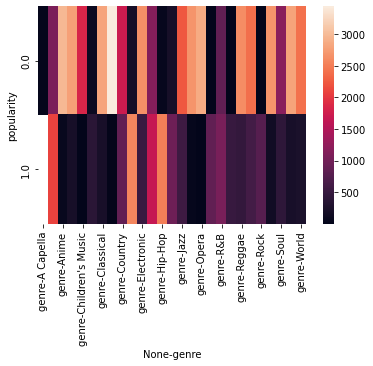

In [ ]:
sns.heatmap(df.groupby(['popularity','genre']).agg({'genre':'count'}).unstack())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<Figure size 432x288 with 0 Axes>

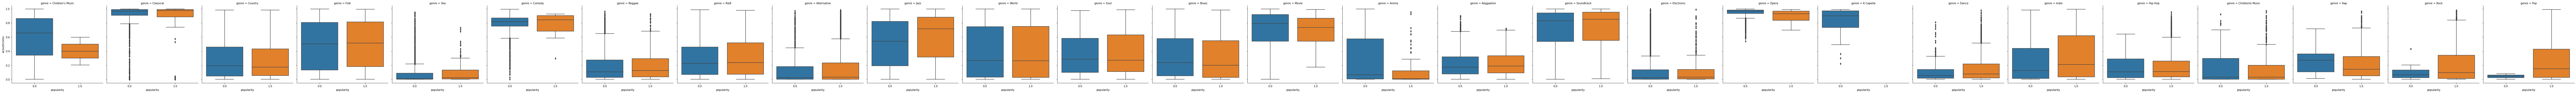

<Figure size 432x288 with 0 Axes>

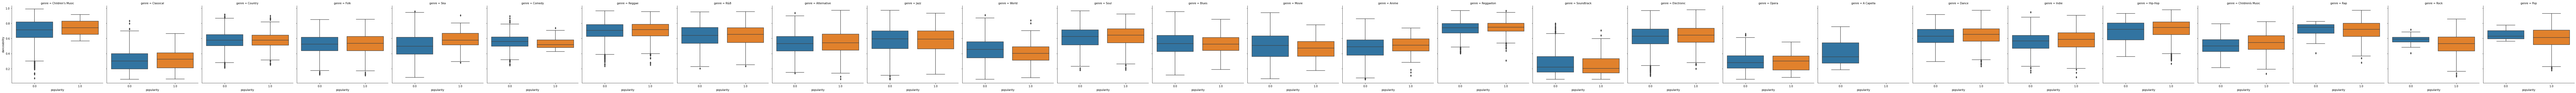

<Figure size 432x288 with 0 Axes>

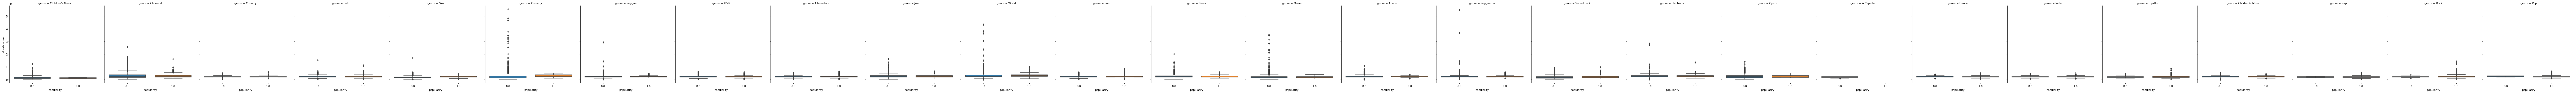

<Figure size 432x288 with 0 Axes>

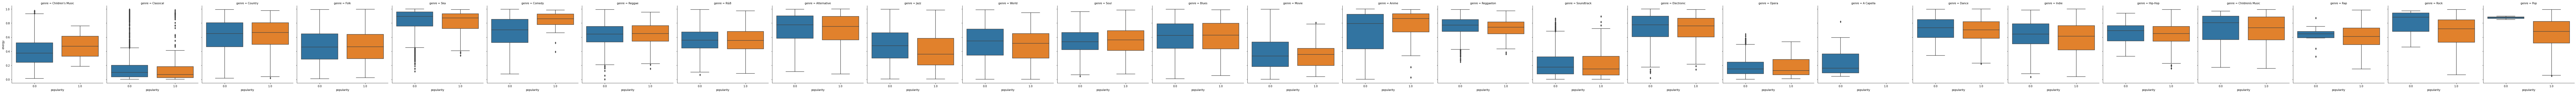

<Figure size 432x288 with 0 Axes>

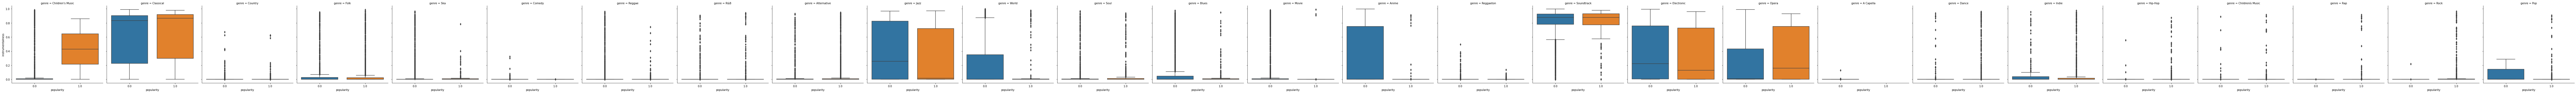

<Figure size 432x288 with 0 Axes>

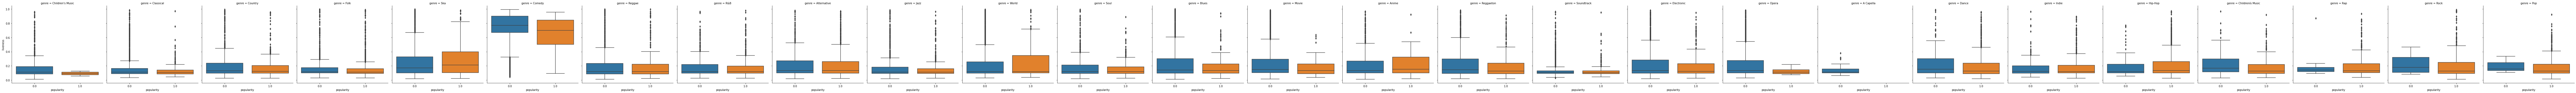

<Figure size 432x288 with 0 Axes>

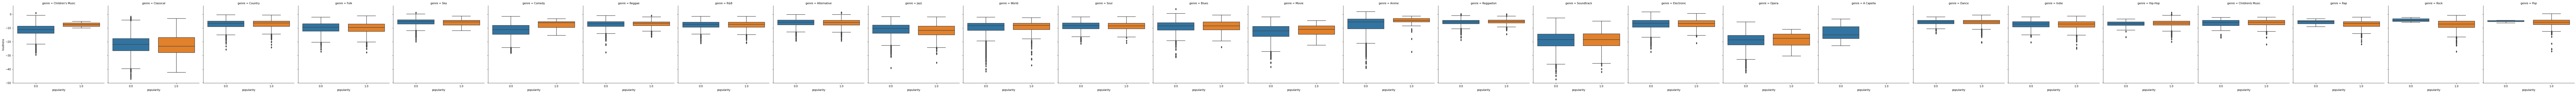

<Figure size 432x288 with 0 Axes>

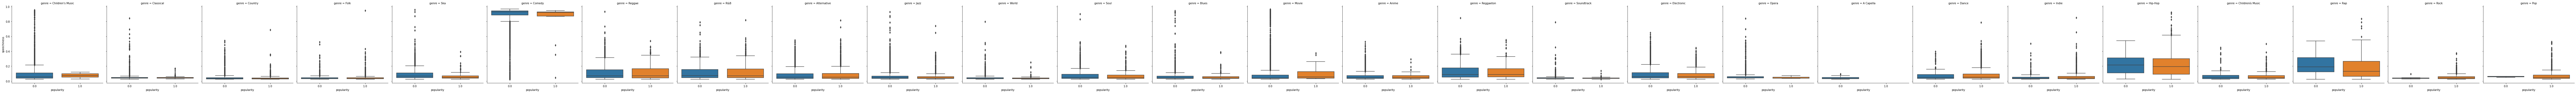

<Figure size 432x288 with 0 Axes>

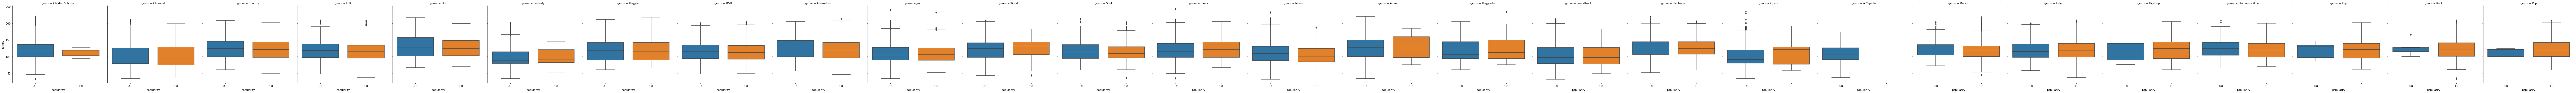

<Figure size 432x288 with 0 Axes>

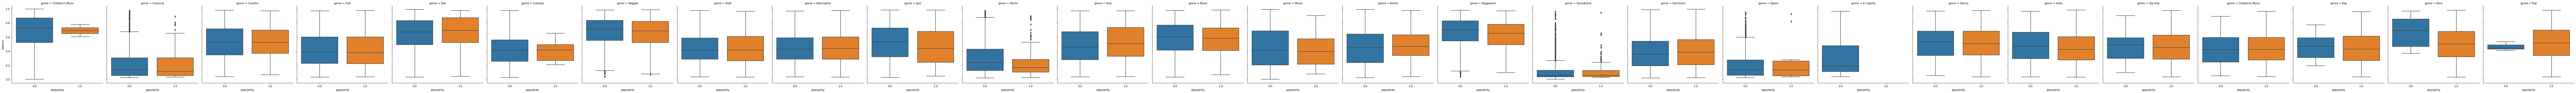

<Figure size 432x288 with 0 Axes>

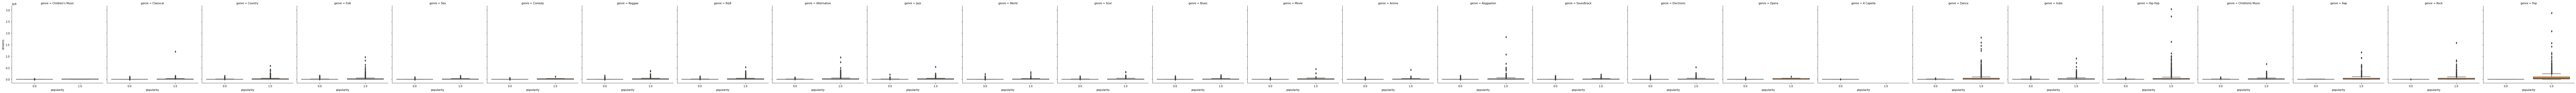

In [ ]:
# Genre might affect streams, and each genre has sufficient count of samples
# Artist also might affect streams, but some artist don't have sufficient samples

# Plot streams vs numerical columns for each genre
for c in np.array(df.columns)[[6,7,8,9,10,12,13,15,16,17,18]]:
  plt.figure()
  sns.catplot(data=df, x='popularity', y=c, col='genre', kind='box')
              
  #g = sns.FacetGrid(df, col='genre', hue='genre', sharex=False, sharey=False)
  #g.map(sns.boxplot, 'popularity', c)

### artist_name

In [ ]:
df['artist_name'].value_counts()

Giuseppe Verdi             456
Giacomo Puccini            382
Kimbo Children's Music     336
Richard Wagner             274
Wolfgang Amadeus Mozart    265
                          ... 
Cale Dodds                   1
Dyzzi from DivSel            1
Paris Hilton                 1
Slowy                        1
Marcell                      1
Name: artist_name, Length: 10426, dtype: int64

In [ ]:
# Check top artists
thd = 100
d = pd.DataFrame(df['artist_name'].value_counts()).reset_index()
(d['artist_name'] >= thd).sum()

29

In [ ]:
d[d['artist_name'] >= thd]['artist_name'].sum() / d['artist_name'].sum()

0.08891367243692318

# Model1: Logistic Regression

Try X setups
- Independent val: only numerical except tempo and duration
- Independent val: numerical + key&mode
- xx

## Data Preparation

In [52]:
# Prepare data including null record
df1 = pd.read_csv('https://raw.githubusercontent.com/michikotanaka/dso559/main/Songs-utf8.csv')

In [53]:
# Encode key
df1 = pd.get_dummies(df1, columns=['key'])

In [54]:
# Encode mode
df1 = pd.get_dummies(df1, columns=['mode'])

In [55]:
# Encode genre
df1 = pd.get_dummies(df1, columns=['genre'])

In [56]:
# Encode artists having more than 100 songs, and others
thd = 100
d = pd.DataFrame(df1['artist_name'].value_counts()).reset_index()
major = list(d[d['artist_name'] >= thd]['index'])

df1['major_artists'] = df1['artist_name']
df1.loc[~df1['artist_name'].isin(major), 'major_artists'] = np.NaN

df1 = pd.get_dummies(df1, columns=['major_artists'])

## Modeling

In [57]:
df1.head()

,No,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,major_artists_Rancid,major_artists_Randy Newman,major_artists_Reel Big Fish,major_artists_Richard Wagner,major_artists_Riders In The Sky,major_artists_Shane & Shane,major_artists_The Countdown Kids,major_artists_Thomas Newman,major_artists_Wolfgang Amadeus Mozart,major_artists_Yuki Hayashi
0,1,The Hit Crew Kids,All I Want for Christmas is You,4qay5fwn7RjLWUjfipa3fY,0.0,0.116000,0.484,233947,0.7200,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,2,John Philip Sousa,"March of the Pan Americans: No. 17, Paraguay",4yiaXHY8qYxpEVfeJOlFDz,0.0,0.978000,0.363,171213,0.0847,0.828000,...,0,0,0,0,0,0,0,0,0,0
2,3,Dierks Bentley,My Last Name,5Sgozi87WjzpSxQnzKO8J7,0.0,0.568000,0.583,210240,0.3670,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,4,Against Me!,"Sink, Florida, Sink",3JYWwjsqtBPQ7xQyIg6x0c,0.0,0.660000,0.592,160667,0.3400,0.000052,...,0,0,0,0,0,0,0,0,0,0
4,5,Teenage Bottlerocket,I Found The One,1lXgfyQsOfwtGE26Hh9jXb,0.0,0.000342,0.459,137080,0.9130,0.001130,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88386 entries, 0 to 88385
Data columns (total 98 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      88386 non-null  int64  
 1   artist_name                             88386 non-null  object 
 2   track_name                              88386 non-null  object 
 3   track_id                                88386 non-null  object 
 4   popularity                              61869 non-null  float64
 5   acousticness                            88386 non-null  float64
 6   danceability                            88386 non-null  float64
 7   duration_ms                             88386 non-null  int64  
 8   energy                                  88386 non-null  float64
 9   instrumentalness                        88386 non-null  float64
 10  liveness                                88386 non-null  fl

In [59]:
# Independent variables Setups
setups = {}

# TRY1: Logistic Regression with numeric columns (other than tempo & duration)
setups['TRY1'] = np.r_[5:7, 8:13, 14]
# TRY2: Logistic Regression (numeric columns, key, mode)
setups['TRY2'] = np.r_[5:7, 8:13, 14, 16:19, 20:28, 29] # skip Key_C & mode_Major to avoid multi-colinearity
# TRY3: Logistic Regression (numeric columns, genre)
#setups['TRY3'] = np.r_[5:7, 8:13, 14, 30:37, 38:17] # skip comedy to avoid multi-colinearity
# --> having some error on training, not sure how to do



**********  TRY1
Independent Vals:['acousticness' 'danceability' 'energy' 'instrumentalness' 'liveness'
 'loudness' 'speechiness' 'valence']
Coefficients.  : [[-0.90208562  2.39134952 -1.11884557 -1.12798374 -0.95463637  0.09781004
  -0.98303096 -1.45280105]]
Score for train: 0.7226783905519277
Score for test : 0.7244634083268684
Confusion matrix : 
col_0         0.0  1.0
popularity            
0.0         10218  751
1.0          3511  988
Max revenue: 
    cutoff       revenue
14    0.14  1.525545e+09

**********  TRY2
Independent Vals:['acousticness' 'danceability' 'energy' 'instrumentalness' 'liveness'
 'loudness' 'speechiness' 'valence' 'key_A' 'key_A#' 'key_B' 'key_C#'
 'key_D' 'key_D#' 'key_E' 'key_F' 'key_F#' 'key_G' 'key_G#' 'mode_Minor']
Coefficients.  : [[-8.83121275e-01  2.33948030e+00 -1.13539759e+00 -1.14876348e+00
  -9.38760167e-01  9.76731651e-02 -1.05782799e+00 -1.42263705e+00
  -2.20099125e-02  1.78593277e-03 -5.52684170e-02  1.56603977e-01
  -2.75368103e-02  2.503961

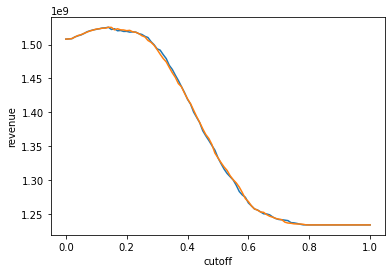

In [60]:
for key in setups.keys():
  # Print setup
  print('\n**********  ' + key)
  print('Independent Vals:' + str(np.array(df1.columns)[setups[key]]))

  # Create X,y
  X = df1.dropna().iloc[:, setups[key]]
  y = df1.dropna()['popularity']
  # Split data
  X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

  # Train
  #model = LogisticRegression(random_state=0, class_weight = 'balanced')
  model = LogisticRegression(random_state=0)
  model.fit(X_train, y_train)
  print('Coefficients.  : ' + str(model.coef_))

  # Evaluate logistic regression (with default cutoff=0.5)
  print('Score for train: ' + str(model.score(X_train, y_train)))
  print('Score for test : ' + str(model.score(X_test, y_test)))
  print('Confusion matrix : ')
  print(pd.crosstab(y_test, model.predict(X_test)))

  # Evaluate business value (with cutoff sweep)
  ## Business Strategy : if a song is predicted as popular then Option#1, else Option#2
  ## Revenue = (Revenue from Option#1 songs) + (Revenue from Option#2 songs)
  ## Revenue from Option#1 songs = (Revenue from songs which is actually popular)
  ##                               + (Revenue from songs which is NOT popular)
  ## Revenue from songs which is actually popular = sum of ($0.0084 * streams)
  ## Revenue from songs which is NOT popular = sum of ($0.002 * streams)
  ## Revenue from Option#2 songs = sum of ($0.006 * streams)
  revlist = []
  for c in np.linspace(0,1,101):
    res = pd.DataFrame({'actual': list(df1.dropna().iloc[X_test.index, 4]),
                        'streams': list(df1.dropna().iloc[X_test.index, 15]),
                        'predict': list((pd.DataFrame(model.predict_proba(X_test))[1] > c).astype(int)),
                        'predict_prob': list(pd.DataFrame(model.predict_proba(X_test)).iloc[:,1])
    })
    # Create 0/1 column
    res['actual_0'] = (res['actual'] == 0).astype(int)
    res['actual_1'] = (res['actual'] == 1).astype(int)
    res['predict_0'] = (res['predict'] == 0).astype(int)
    res['predict_1'] = (res['predict'] == 1).astype(int)
    # Revenue
    revenue = sum(res['predict_1'] * res['actual_1'] * res['streams'] * 0.0084) \
    + sum(res['predict_1'] * res['actual_0'] * res['streams'] * 0.002) \
    + sum(res['predict_0'] * res['streams'] * 0.006)
    #print(res)
    #print('dbg: ' + str(sum(res['predict_1'] * res['actual_1'])) + ',' + str(sum(res['predict_1'] * res['actual_0'])) + ',' + str(sum(res['predict_0'])) )
    revlist.append([c,revenue])

  # Results
  d = pd.DataFrame(revlist)
  d.columns = ['cutoff', 'revenue']
  # Revenue Max cutoff
  print('Max revenue: \n' + str(d[d['revenue'] == max(d['revenue'] )]))
  # Plot
  #plt.figure()
  sns.lineplot(data = d, x='cutoff', y='revenue')


In [66]:
# Final model:
#.  Independent variables: TRY1
#.  Cutoff: 0.14

key = 'TRY1'
c = 0.14


# Create X,y
X = df1.dropna().iloc[:, setups[key]]
y = df1.dropna()['popularity']
# Split data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Train
#model = LogisticRegression(random_state=0, class_weight = 'balanced')
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
print('Coefficients.  : ' + str(model.coef_))

# Do prediction
X_f = df1[df1['popularity'].isnull()].iloc[:, setups[key]]
pred_f = (pd.DataFrame(model.predict_proba(X_f))[1] > c).astype(int)

Coefficients.  : [[-0.90208562  2.39134952 -1.11884557 -1.12798374 -0.95463637  0.09781004
  -0.98303096 -1.45280105]]


In [67]:
# Write to file
pred_f.to_csv('predictions.csv') 
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Mode2: Decision Tree

In [ ]:
# codes here